In [1]:
import pandas as pd
import numpy as np

## Import data files

In [2]:
df_raw_train = pd.read_csv('../data/raw/train.csv')
df_raw_test = pd.read_csv('../data/raw/test.csv')

### Declare variables for data splitting

In [3]:
train_df_size = 0.8
rand_state_ind = 42
validation_df_size = 0.2

### Raw data checks

In [4]:
df_raw_train.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [5]:
df_raw_train.shape

(8000, 21)

In [6]:
df_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

In [7]:
df_raw_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [8]:
df_raw_test.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


In [9]:
df_raw_test.shape

(3799, 20)

In [10]:
df_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       3799 non-null   int64  
 1   GP       3799 non-null   int64  
 2   MIN      3799 non-null   float64
 3   PTS      3799 non-null   float64
 4   FGM      3799 non-null   float64
 5   FGA      3799 non-null   float64
 6   FG%      3799 non-null   float64
 7   3P Made  3799 non-null   float64
 8   3PA      3799 non-null   float64
 9   3P%      3799 non-null   float64
 10  FTM      3799 non-null   float64
 11  FTA      3799 non-null   float64
 12  FT%      3799 non-null   float64
 13  OREB     3799 non-null   float64
 14  DREB     3799 non-null   float64
 15  REB      3799 non-null   float64
 16  AST      3799 non-null   float64
 17  STL      3799 non-null   float64
 18  BLK      3799 non-null   float64
 19  TOV      3799 non-null   float64
dtypes: float64(18), int64(2)
memory usage: 593.7 KB


In [11]:
df_raw_test.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,-0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


## Data processing

### Dataset with first order variables

In [12]:
df_cleaned_train = df_raw_train.copy()
df_cleaned_test = df_raw_test.copy()

In [13]:
#Move the TARGET_5Yrs and Id columns to separate series
#Id column data can be reintroduced to dataframe if needed
target = df_cleaned_train.pop('TARGET_5Yrs')
IDlist_train = df_cleaned_train.pop('Id')
df_col_names = df_cleaned_train.columns

array([[<AxesSubplot:title={'center':'GP'}>,
        <AxesSubplot:title={'center':'MIN'}>,
        <AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'FGM'}>],
       [<AxesSubplot:title={'center':'FGA'}>,
        <AxesSubplot:title={'center':'FG%'}>,
        <AxesSubplot:title={'center':'3P Made'}>,
        <AxesSubplot:title={'center':'3PA'}>],
       [<AxesSubplot:title={'center':'3P%'}>,
        <AxesSubplot:title={'center':'FTM'}>,
        <AxesSubplot:title={'center':'FTA'}>,
        <AxesSubplot:title={'center':'FT%'}>],
       [<AxesSubplot:title={'center':'OREB'}>,
        <AxesSubplot:title={'center':'DREB'}>,
        <AxesSubplot:title={'center':'REB'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':'TOV'}>, <AxesSubplot:>]],
      dtype=object)

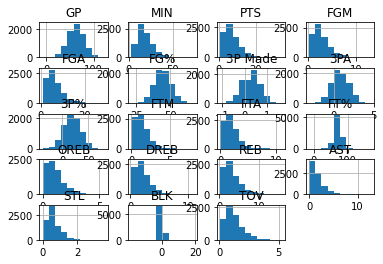

In [14]:
df_cleaned_train.hist()

In [15]:
IDlist_test = df_cleaned_test.pop('Id')

## Data scaling

In [16]:
from sklearn.preprocessing import StandardScaler
from joblib import dump

In [17]:
#Only need to scale the first order variables, so that the second order variables will have same scalings
scaler = StandardScaler()

In [18]:
#Scikit learn methods produce arrays as output, therefore Id will need to be re-introduced after transform back to dataframe
array_cleaned_train = scaler.fit_transform(df_cleaned_train)

In [19]:
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

In [20]:
#Now transform the test dataset 
array_cleaned_test = scaler.transform(df_cleaned_test) 

## Data splitting

In [21]:
#Before splitting datasets, reintroduce Id column
df_cleaned_scaled_train = pd.DataFrame(array_cleaned_train,columns=df_col_names)
df_cleaned_scaled_train.insert(loc=0,column='Id',value=IDlist_train)

In [22]:
#Then on the test dataset
df_cleaned_scaled_test = pd.DataFrame(array_cleaned_test,columns=df_col_names)
df_cleaned_scaled_test.insert(loc=0,column='Id',value=IDlist_test)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train_lin, X_val_lin, y_train_lin, y_val_lin = train_test_split(df_cleaned_scaled_train, target, train_size=train_df_size, random_state=rand_state_ind, stratify=target)

In [25]:
np.save('../data/processed/X_train_lin', X_train_lin)
np.save('../data/processed/X_val_lin',   X_val_lin)
np.save('../data/processed/X_test_lin',  df_cleaned_scaled_test)
np.save('../data/processed/y_train_lin', y_train_lin)
np.save('../data/processed/y_val_lin',   y_val_lin)

## Dataset with second order variables including interaction variables

In [28]:
#Next handle second order variables
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [29]:
#This line inputs column names of first order variables
poly.feature_names_in_ = df_col_names
array_clean_poly_train = poly.fit_transform(df_cleaned_train)
#This line outputs column names that include all second order variables
polyFeatureNames = poly.get_feature_names_out()

In [30]:
dump(poly, '../models/poly.joblib')

['../models/poly.joblib']

In [31]:
df_cleaned_poly_train = pd.DataFrame(array_clean_poly_train,columns=polyFeatureNames)
df_cleaned_poly_train.insert(loc=0,column='Id',value=IDlist_train)

In [32]:
array_clean_poly_test = poly.transform(df_cleaned_test)
df_cleaned_poly_test = pd.DataFrame(array_clean_poly_test,columns=polyFeatureNames)
df_cleaned_poly_test.insert(loc=0,column='Id',value=IDlist_test)

In [33]:
X_train_poly, X_val_poly, y_train_poly, y_val_poly = train_test_split(df_cleaned_poly_train, target, train_size=train_df_size, random_state=rand_state_ind, stratify=target)

In [34]:
np.save('../data/processed/X_train_poly', X_train_poly)
np.save('../data/processed/X_val_poly',   X_val_poly)
np.save('../data/processed/X_test_poly',  df_cleaned_poly_test)
np.save('../data/processed/y_train_poly', y_train_poly)
np.save('../data/processed/y_val_poly',   y_val_poly)